# Add 10% of outlier

In [1]:
import sys
import os 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import outliers_utils
import pandas as pd
import ML_algorithms
from sklearn.metrics import classification_report

# Return to previous directory
os.chdir('..')

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df_original = df.copy()
df_original.dropna(axis=0,inplace=True)
df_original = df_original[df_original['age'] >= 0]


df.dropna(axis=0, inplace=True)
df = df[df['age'] >= 0]

outliers_utils.drop_negative_age(df)

## Age

In [2]:
df = df_original.copy()

In [3]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'age')


--------------------------------------
no outliers detected


In [4]:
df_age = outliers_utils.outliers_replace(df, 'age', 10)

Outliers found:


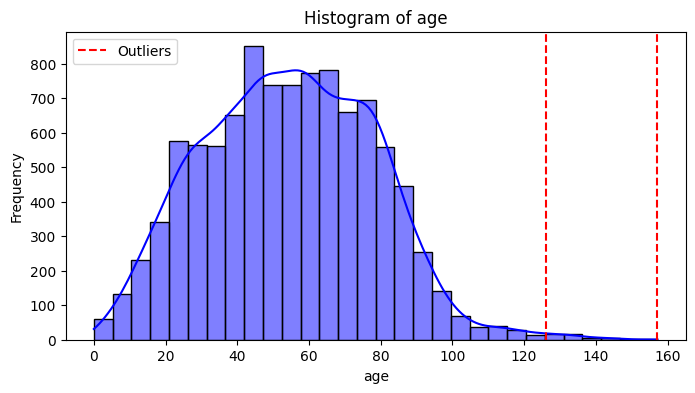

In [5]:
outliers_utils.visualize_outliers_specific(df_age, 'age')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1541
           1       0.84      0.92      0.88      1455

    accuracy                           0.88      2996
   macro avg       0.88      0.88      0.88      2996
weighted avg       0.88      0.88      0.88      2996

Node Labels:
 Annotation(0.610838, 0.954545, 'avg_glucose_level <= 167.285\nsamples = 6988\nvalue = [3464, 3524]\nclass = 1')


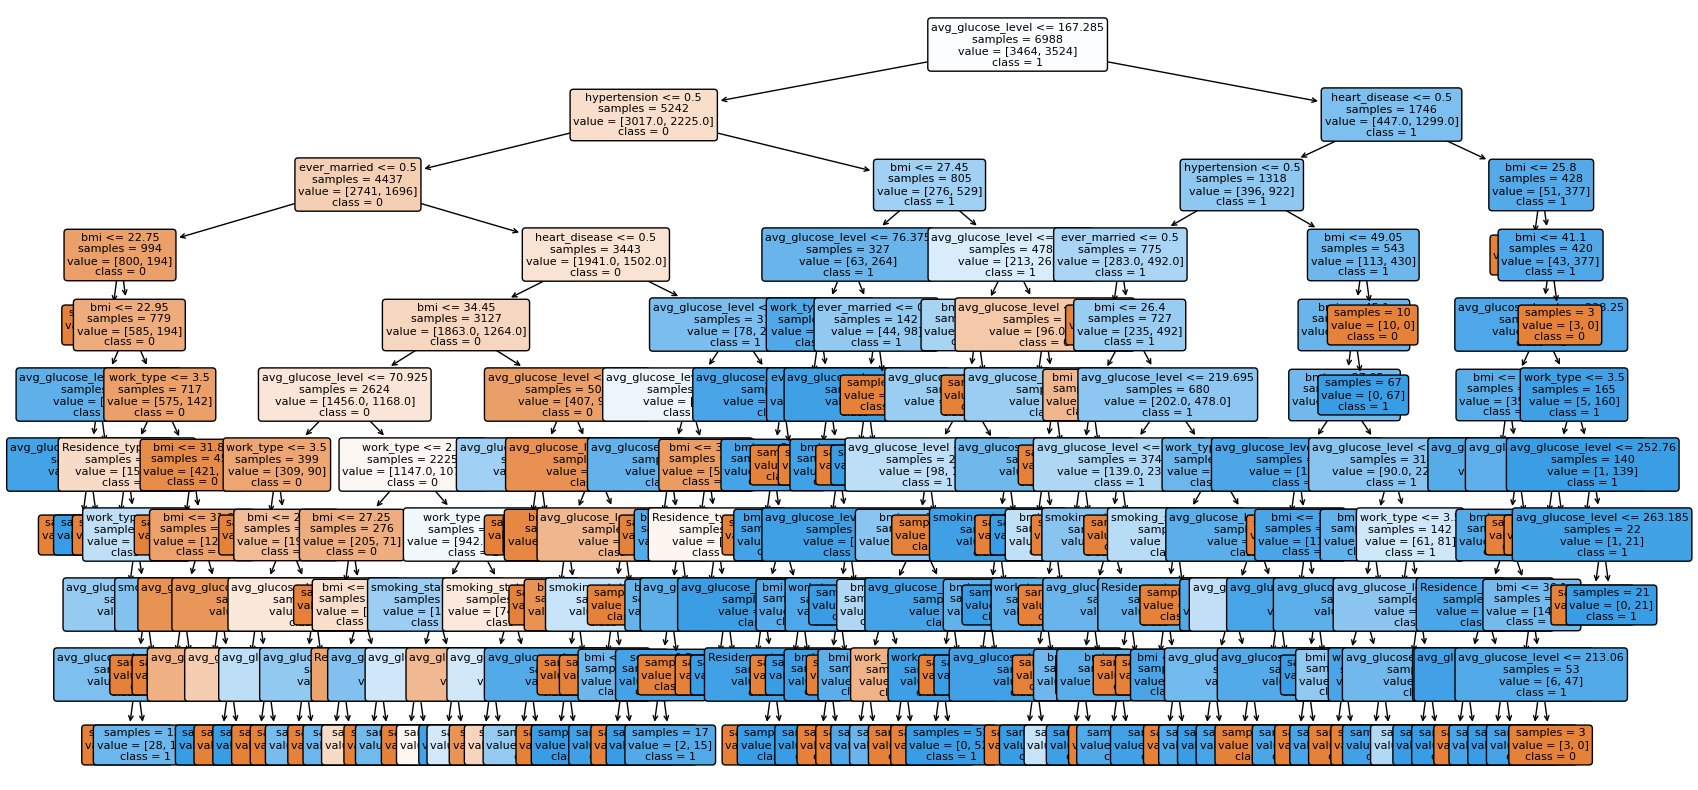

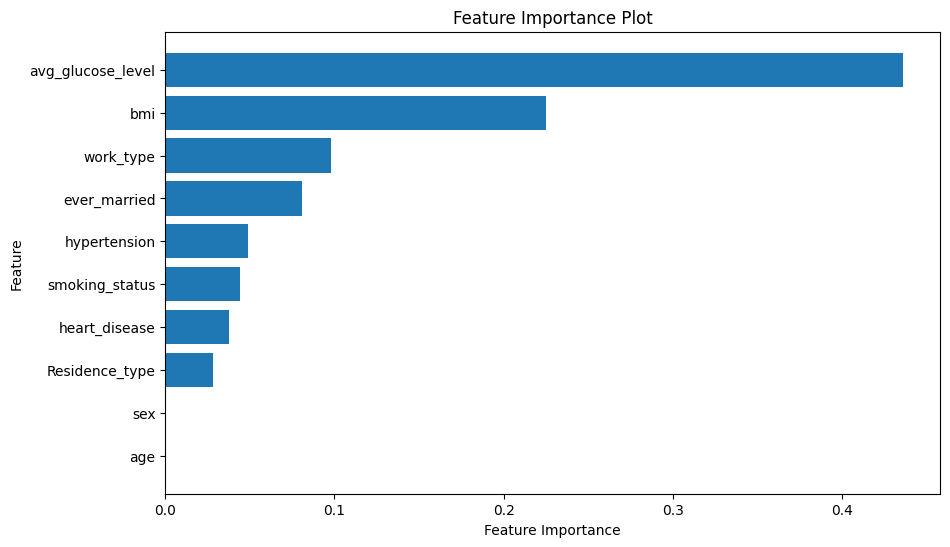

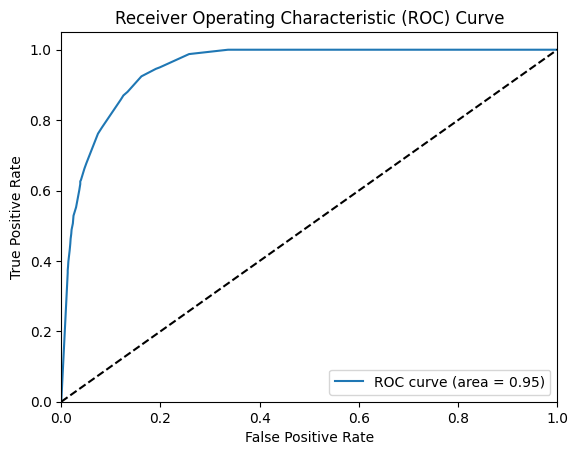

AUC Score: 0.9484553922454068


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7666666666666667, 0.7866666666666666, 0.83, 0.8066666666666666, 0.8433333333333334, 0.78, 0.8662207357859532, 0.8260869565217391, 0.8193979933110368, 0.7759197324414716]
Mean accuracy: 0.8100958751393534
95% confidence interval: (0.7868376664716494, 0.8333540838070574)


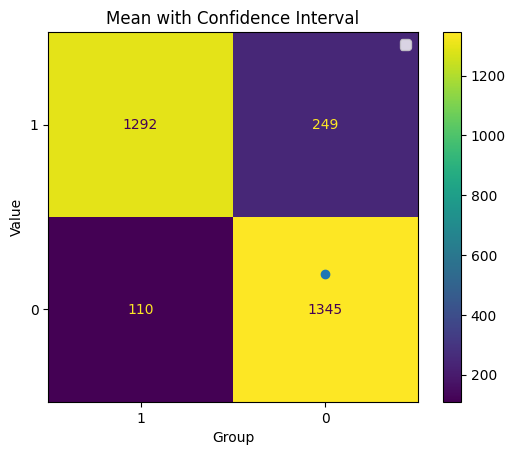

In [6]:
decision_tree = ML_algorithms.model_dt(df_age, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)


**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.67      0.77      0.71      1541
           1       0.71      0.60      0.65      1455

    accuracy                           0.68      2996
   macro avg       0.69      0.68      0.68      2996
weighted avg       0.69      0.68      0.68      2996



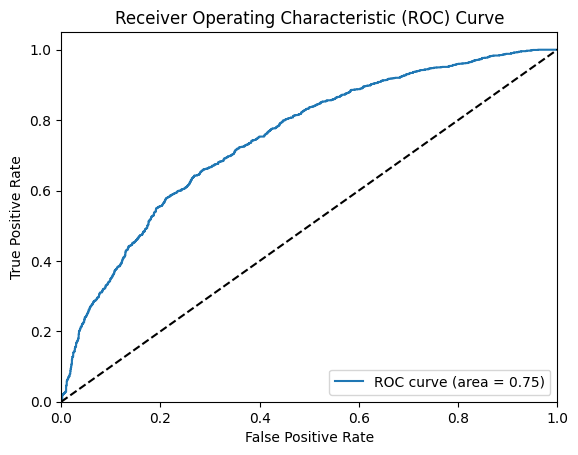

AUC Score: 0.7480531006999964


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6666666666666666, 0.6466666666666666, 0.6433333333333333, 0.6766666666666666, 0.69, 0.6333333333333333, 0.6655518394648829, 0.6923076923076923, 0.6321070234113713, 0.7424749163879598]
Mean accuracy: 0.6689108138238572
95% confidence interval: (0.6447698260587206, 0.6930518015889938)


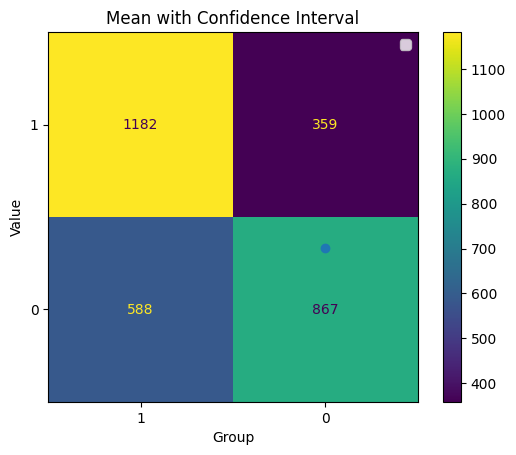

In [7]:
svm = ML_algorithms.model_svm(df_age, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)

### Outliers are transformed into values that at 20% above the mean

In [8]:
df_mean_age = outliers_utils.replace_outliers_with_above_mean_original(df_original, df_age, 'age')

Outliers found:


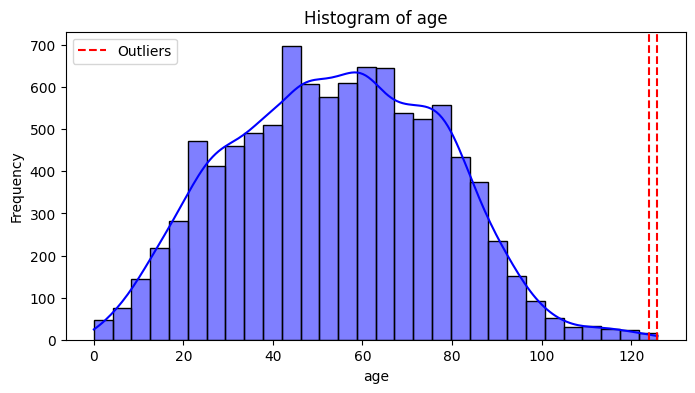

In [9]:
outliers_utils.visualize_outliers_specific(df_mean_age, 'age')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1541
           1       0.84      0.92      0.88      1455

    accuracy                           0.88      2996
   macro avg       0.88      0.88      0.88      2996
weighted avg       0.88      0.88      0.88      2996

Node Labels:
 Annotation(0.610838, 0.954545, 'avg_glucose_level <= 167.285\nsamples = 6988\nvalue = [3464, 3524]\nclass = 1')


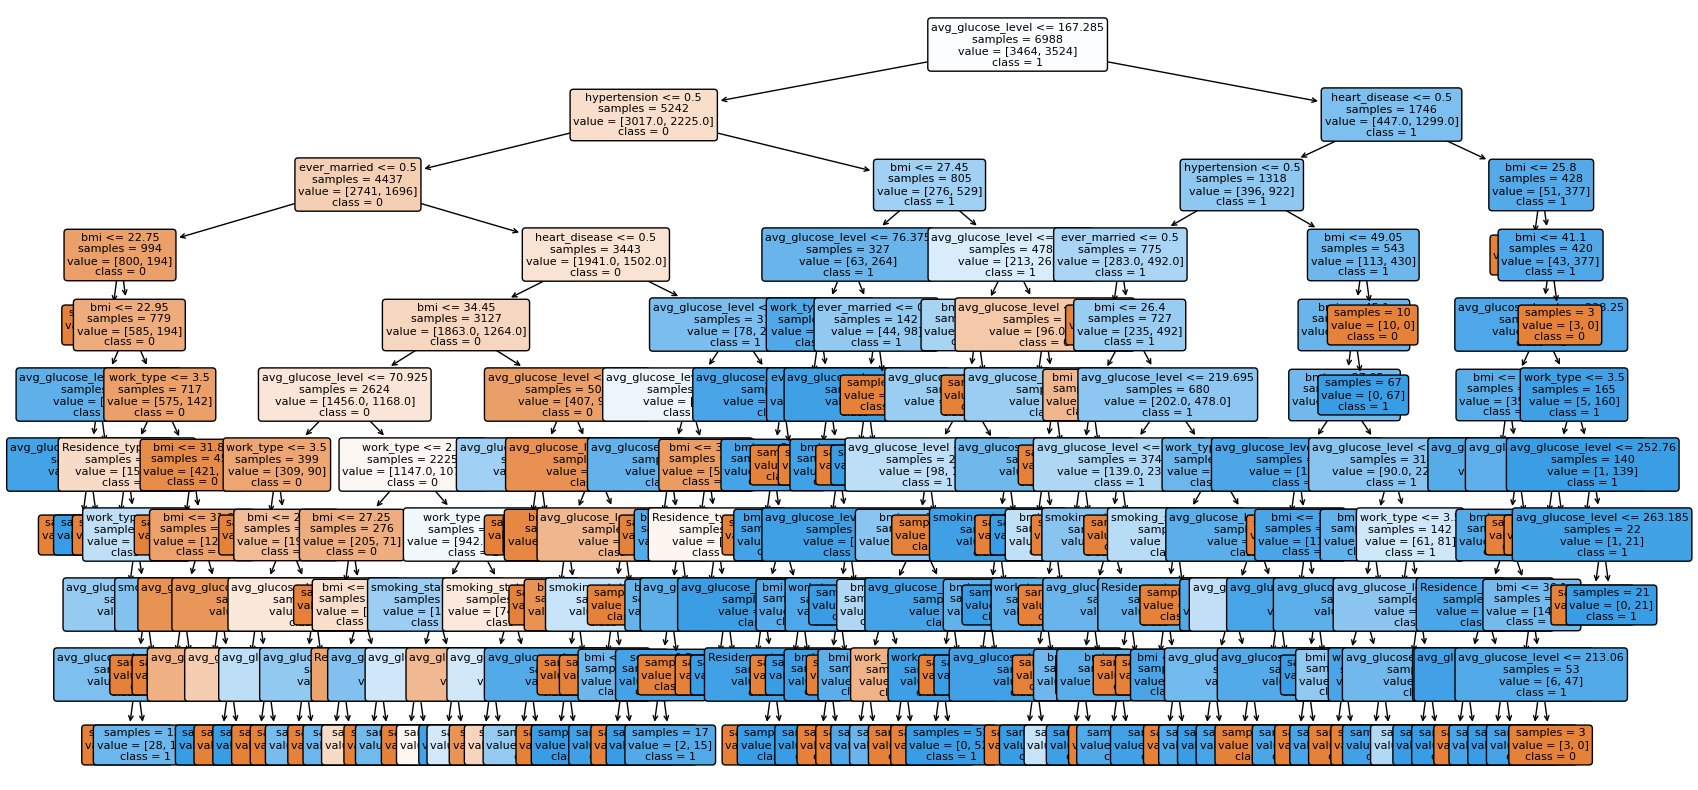

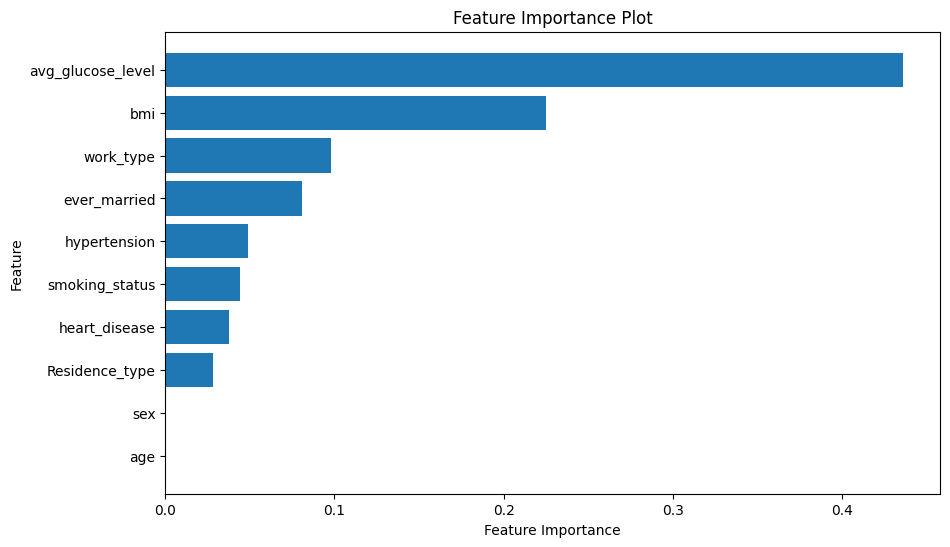

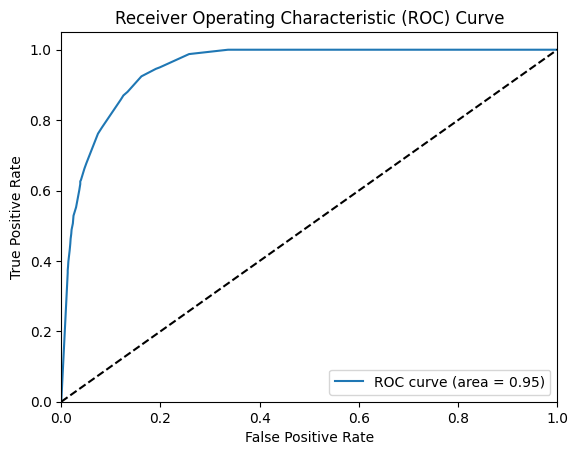

AUC Score: 0.9484553922454068


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7933333333333333, 0.7533333333333333, 0.8066666666666666, 0.78, 0.83, 0.7966666666666666, 0.7859531772575251, 0.8528428093645485, 0.802675585284281, 0.8494983277591973]
Mean accuracy: 0.8050969899665551
95% confidence interval: (0.782772831709406, 0.8274211482237042)


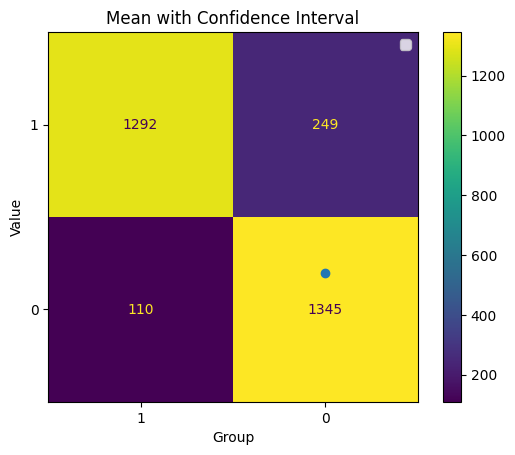

In [10]:
decision_tree = ML_algorithms.model_dt(df_mean_age, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.67      0.77      0.71      1541
           1       0.71      0.60      0.65      1455

    accuracy                           0.68      2996
   macro avg       0.69      0.68      0.68      2996
weighted avg       0.69      0.68      0.68      2996



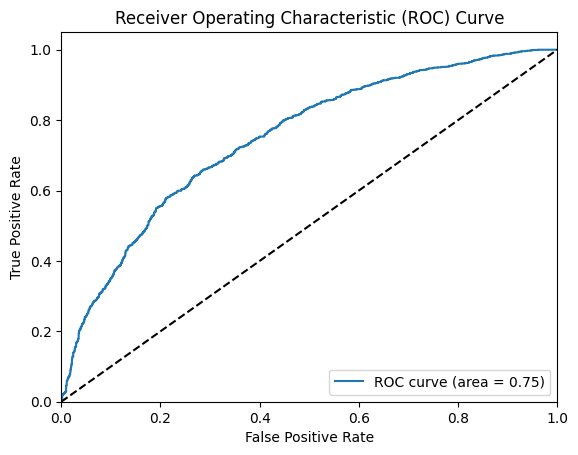

AUC Score: 0.7480464107075558


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6433333333333333, 0.6433333333333333, 0.6233333333333333, 0.65, 0.7466666666666667, 0.6833333333333333, 0.6989966555183946, 0.6588628762541806, 0.6989966555183946, 0.6722408026755853]
Mean accuracy: 0.6719096989966555
95% confidence interval: (0.6459745115276818, 0.6978448864656293)


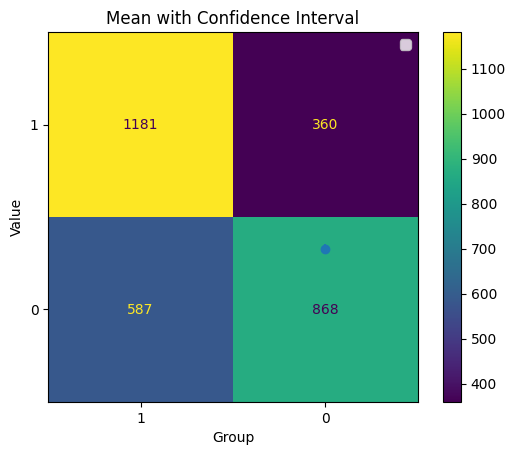

--------------------------------------


In [11]:
svm = ML_algorithms.model_svm(df_mean_age, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)
print('--------------------------------------')

## avg_glucose_level

In [12]:
df = df_original.copy()

In [13]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'avg_glucose_level')

--------------------------------------
no outliers detected


In [14]:
df_glucose = outliers_utils.outliers_replace(df, 'avg_glucose_level', 10)

Outliers found:


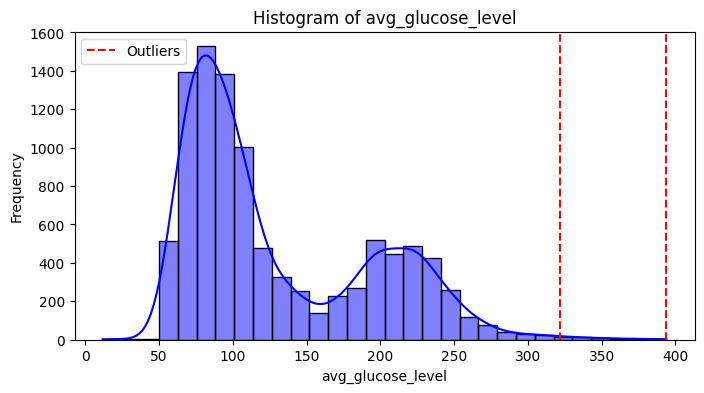

In [15]:
outliers_utils.visualize_outliers_specific(df_glucose, 'avg_glucose_level')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.93      0.76      0.84      1541
           1       0.79      0.94      0.86      1455

    accuracy                           0.85      2996
   macro avg       0.86      0.85      0.85      2996
weighted avg       0.86      0.85      0.85      2996

Node Labels:
 Annotation(0.646204, 0.954545, 'hypertension <= 0.5\nsamples = 6988\nvalue = [3476, 3512]\nclass = 1')


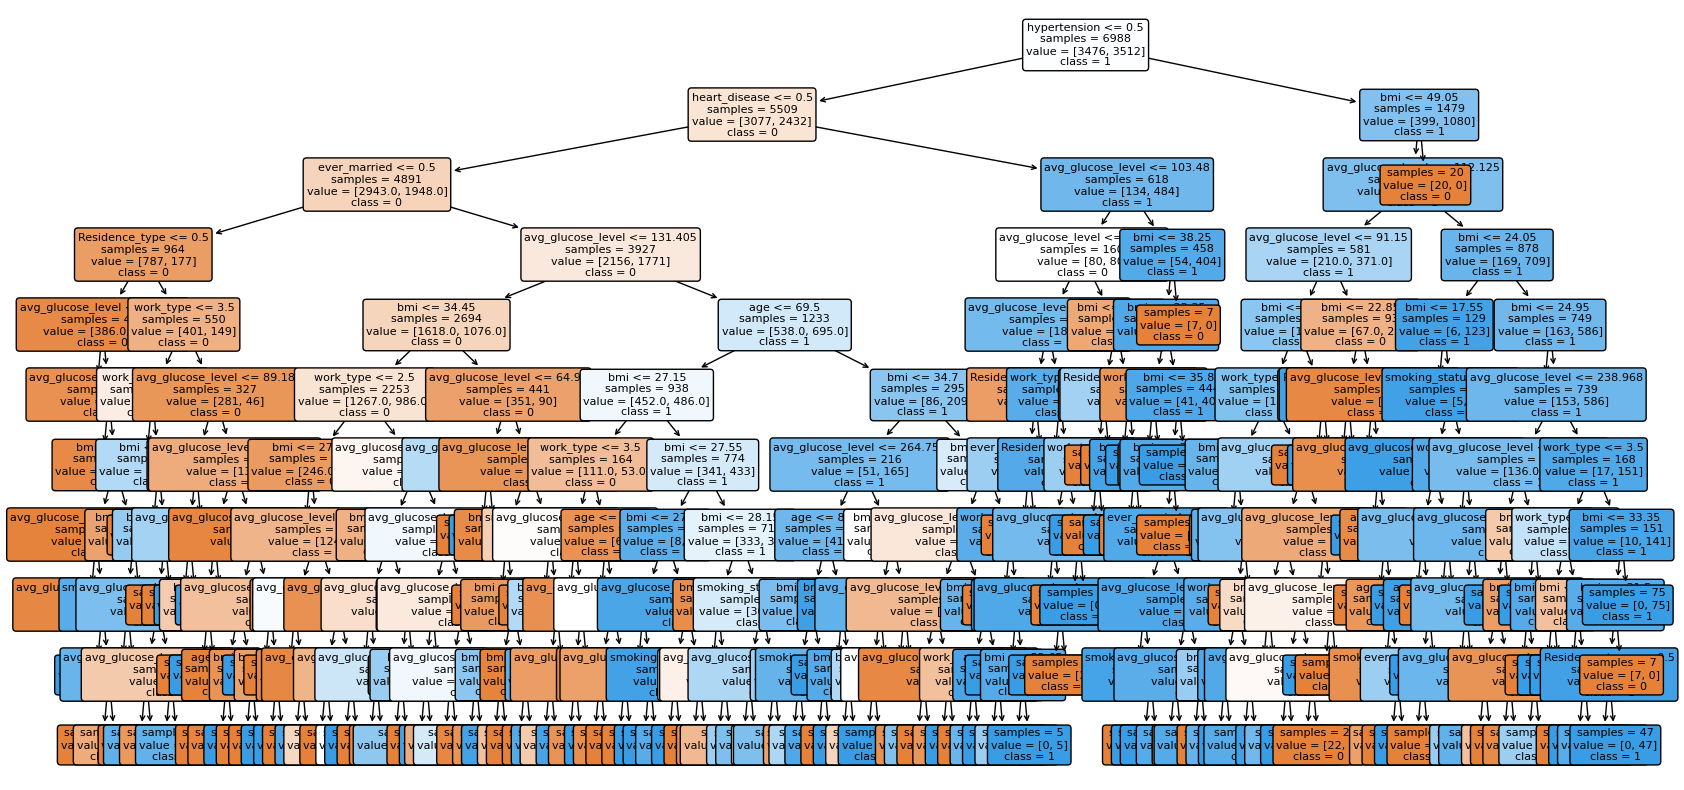

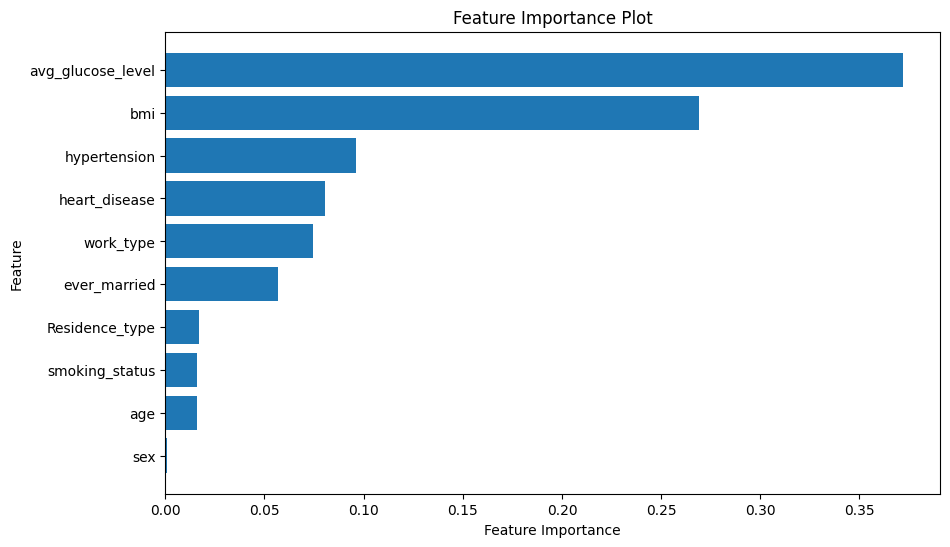

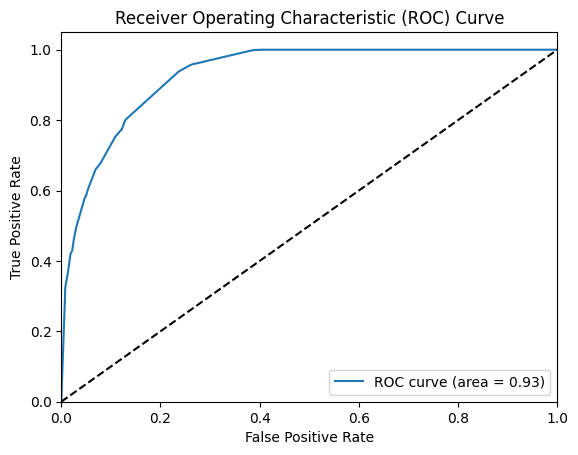

AUC Score: 0.9295307416302618


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8033333333333333, 0.81, 0.82, 0.7866666666666666, 0.8066666666666666, 0.7933333333333333, 0.7926421404682275, 0.8127090301003345, 0.822742474916388, 0.7725752508361204]
Mean accuracy: 0.8020668896321069
95% confidence interval: (0.7908316304514156, 0.8133021488127983)


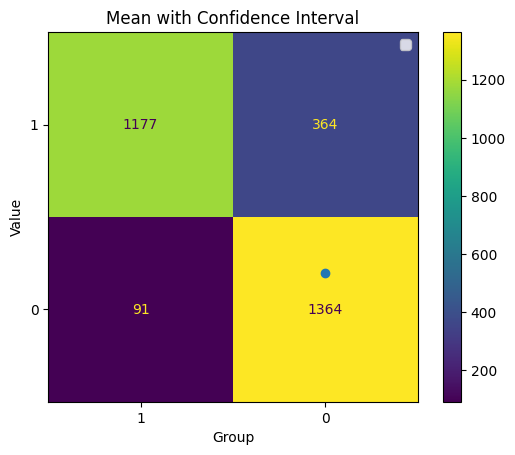

In [16]:
decision_tree = ML_algorithms.model_dt(df_glucose, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)


**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.62      0.86      0.72      1541
           1       0.74      0.44      0.55      1455

    accuracy                           0.65      2996
   macro avg       0.68      0.65      0.63      2996
weighted avg       0.68      0.65      0.64      2996



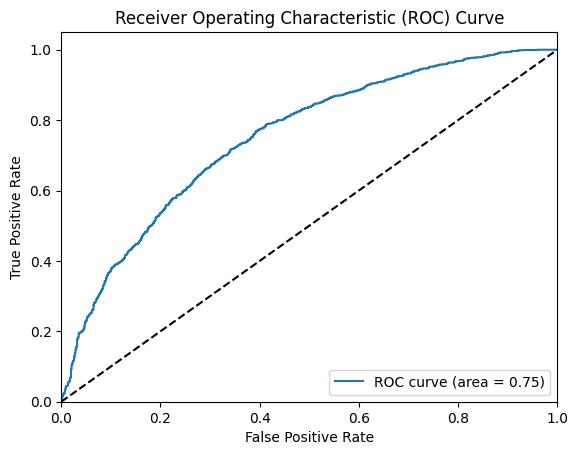

AUC Score: 0.7497153408216648


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6733333333333333, 0.6533333333333333, 0.6366666666666667, 0.7333333333333333, 0.6366666666666667, 0.6733333333333333, 0.6521739130434783, 0.6822742474916388, 0.6321070234113713, 0.6555183946488294]
Mean accuracy: 0.6628740245261984
95% confidence interval: (0.6413609757652157, 0.6843870732871811)


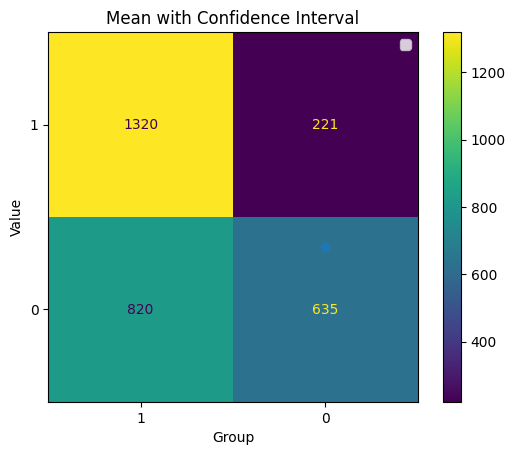

In [17]:
svm = ML_algorithms.model_svm(df_glucose, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)

### Outliers are transformed into values that at 20% above the mean

In [18]:
df_mean_glucose = outliers_utils.replace_outliers_with_above_mean_original(df_original, df_glucose, 'avg_glucose_level')

Outliers found:


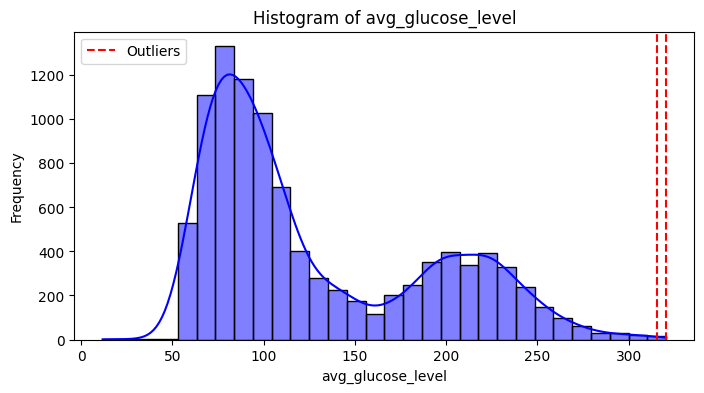

In [19]:
outliers_utils.visualize_outliers_specific(df_mean_glucose, 'avg_glucose_level')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.93      0.76      0.84      1541
           1       0.79      0.94      0.86      1455

    accuracy                           0.85      2996
   macro avg       0.86      0.85      0.85      2996
weighted avg       0.86      0.85      0.85      2996

Node Labels:
 Annotation(0.645402, 0.954545, 'hypertension <= 0.5\nsamples = 6988\nvalue = [3476, 3512]\nclass = 1')


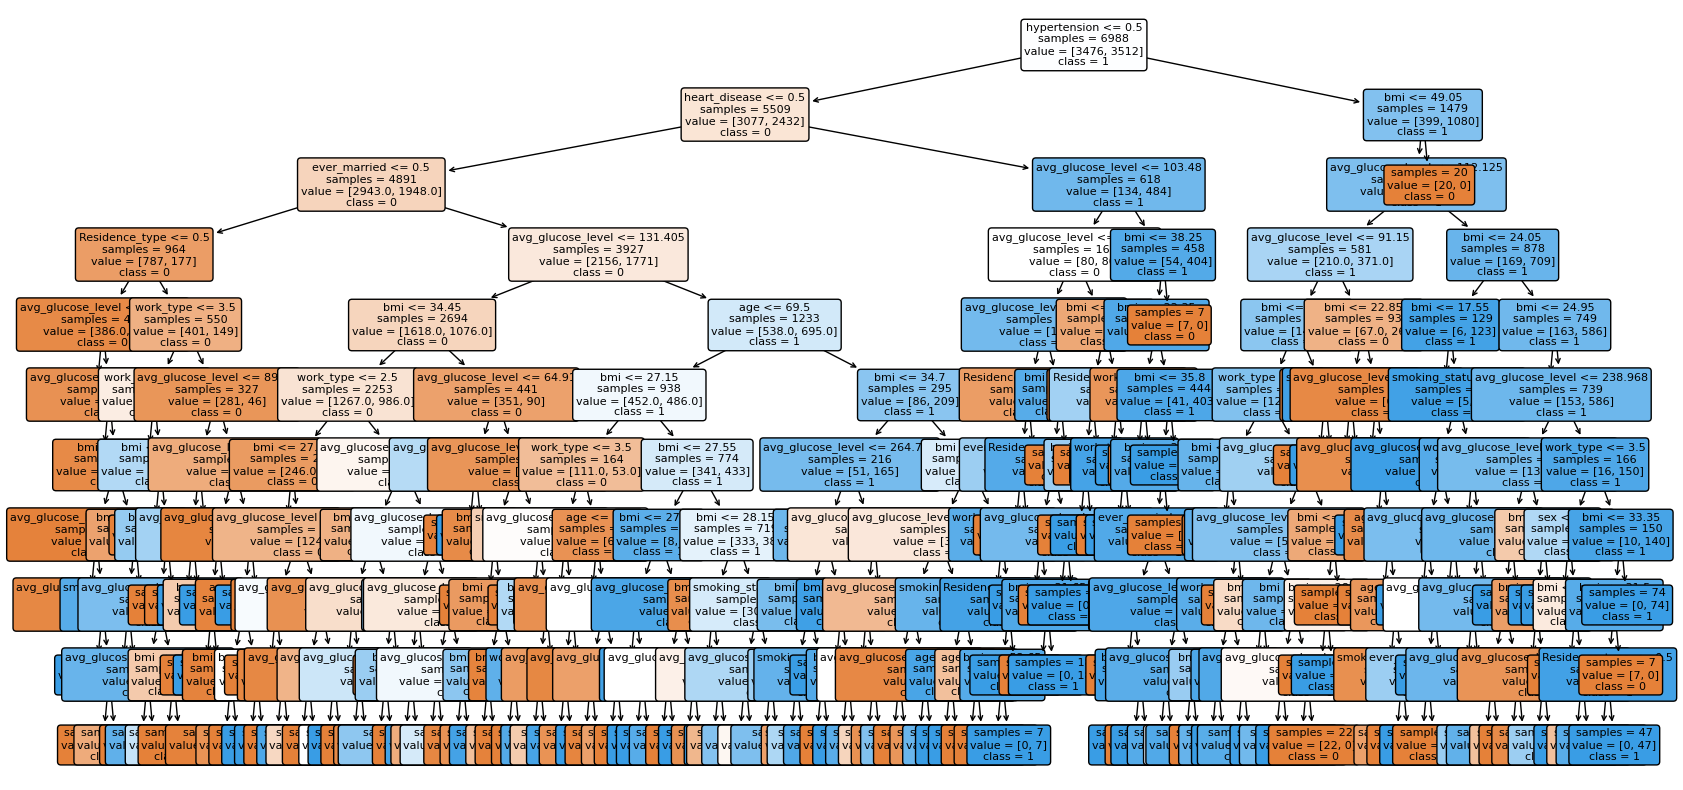

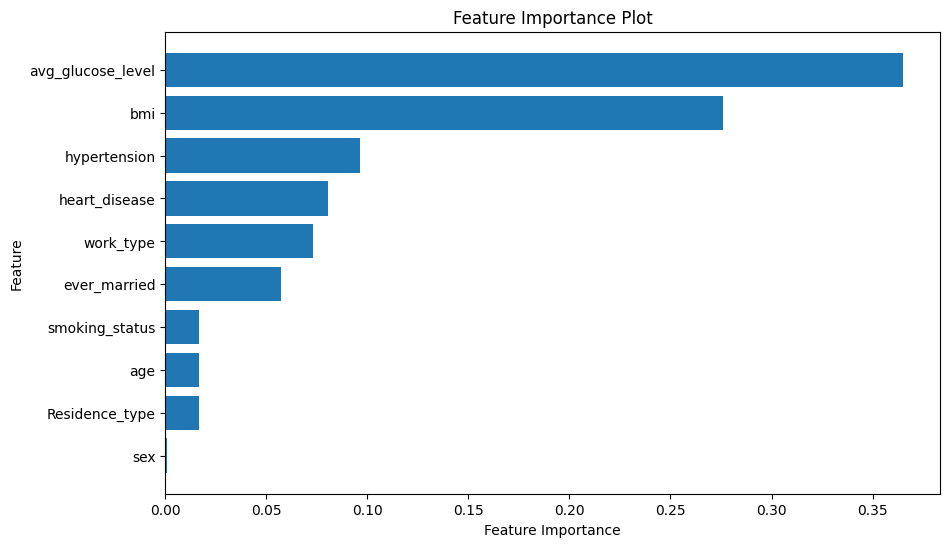

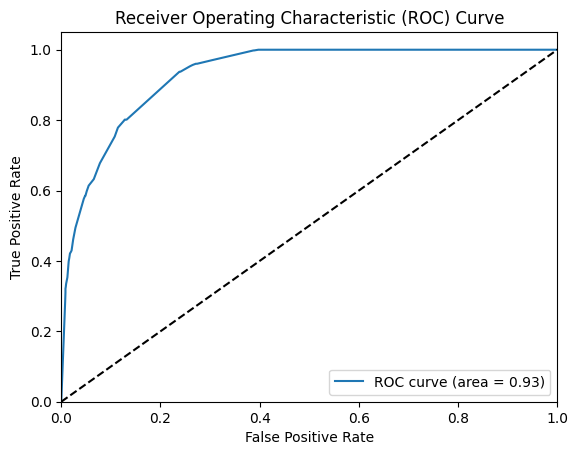

AUC Score: 0.9294034087741481


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.81, 0.81, 0.7933333333333333, 0.8033333333333333, 0.8133333333333334, 0.8366666666666667, 0.8361204013377926, 0.7725752508361204, 0.8093645484949833, 0.8160535117056856]
Mean accuracy: 0.8100780379041248
95% confidence interval: (0.7966645510614061, 0.8234915247468435)


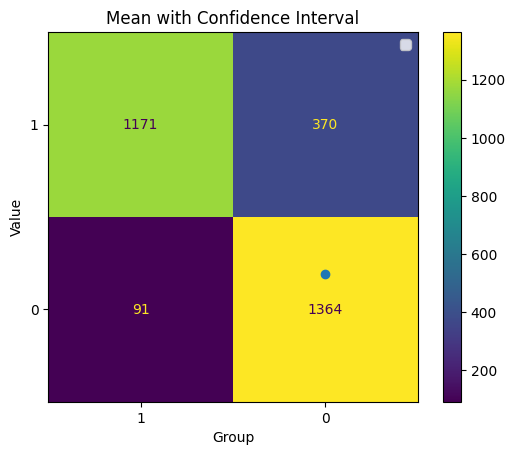

In [20]:
decision_tree = ML_algorithms.model_dt(df_mean_glucose, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.62      0.86      0.72      1541
           1       0.74      0.44      0.55      1455

    accuracy                           0.65      2996
   macro avg       0.68      0.65      0.63      2996
weighted avg       0.68      0.65      0.64      2996



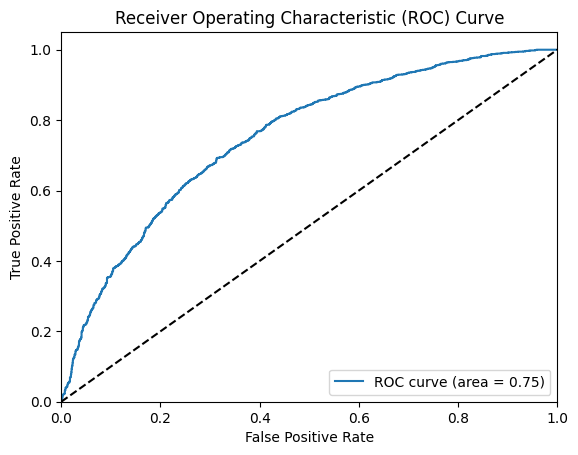

AUC Score: 0.7508780615077906


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.74, 0.66, 0.7066666666666667, 0.6333333333333333, 0.6566666666666666, 0.6633333333333333, 0.6655518394648829, 0.6622073578595318, 0.6923076923076923, 0.6521739130434783]
Mean accuracy: 0.6732240802675584
95% confidence interval: (0.6509787960126214, 0.6954693645224954)


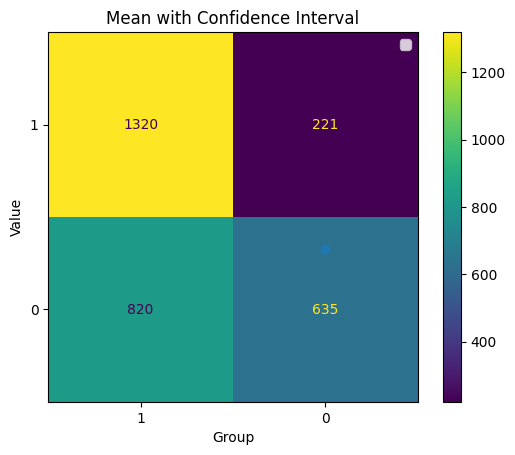

--------------------------------------


In [21]:
svm = ML_algorithms.model_svm(df_mean_glucose, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)
print('--------------------------------------')

## bmi

In [22]:
df = df_original.copy()

--------------------------------------
Outliers found:


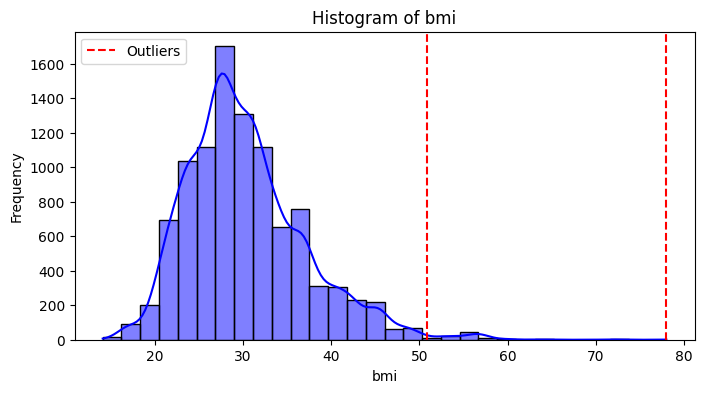

In [23]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'bmi')

In [24]:
df_bmi = outliers_utils.outliers_replace(df, 'bmi', 10)

Outliers found:


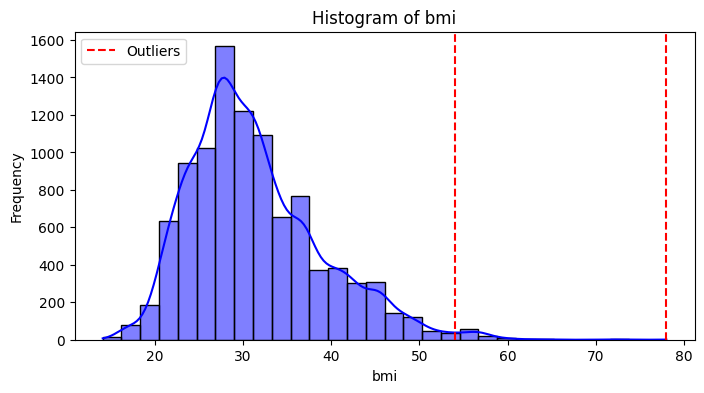

In [25]:
outliers_utils.visualize_outliers_specific(df_bmi, 'bmi')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.91      0.84      0.88      1541
           1       0.84      0.92      0.88      1455

    accuracy                           0.88      2996
   macro avg       0.88      0.88      0.88      2996
weighted avg       0.88      0.88      0.88      2996

Node Labels:
 Annotation(0.572244, 0.954545, 'avg_glucose_level <= 167.36\nsamples = 6988\nvalue = [3480, 3508]\nclass = 1')


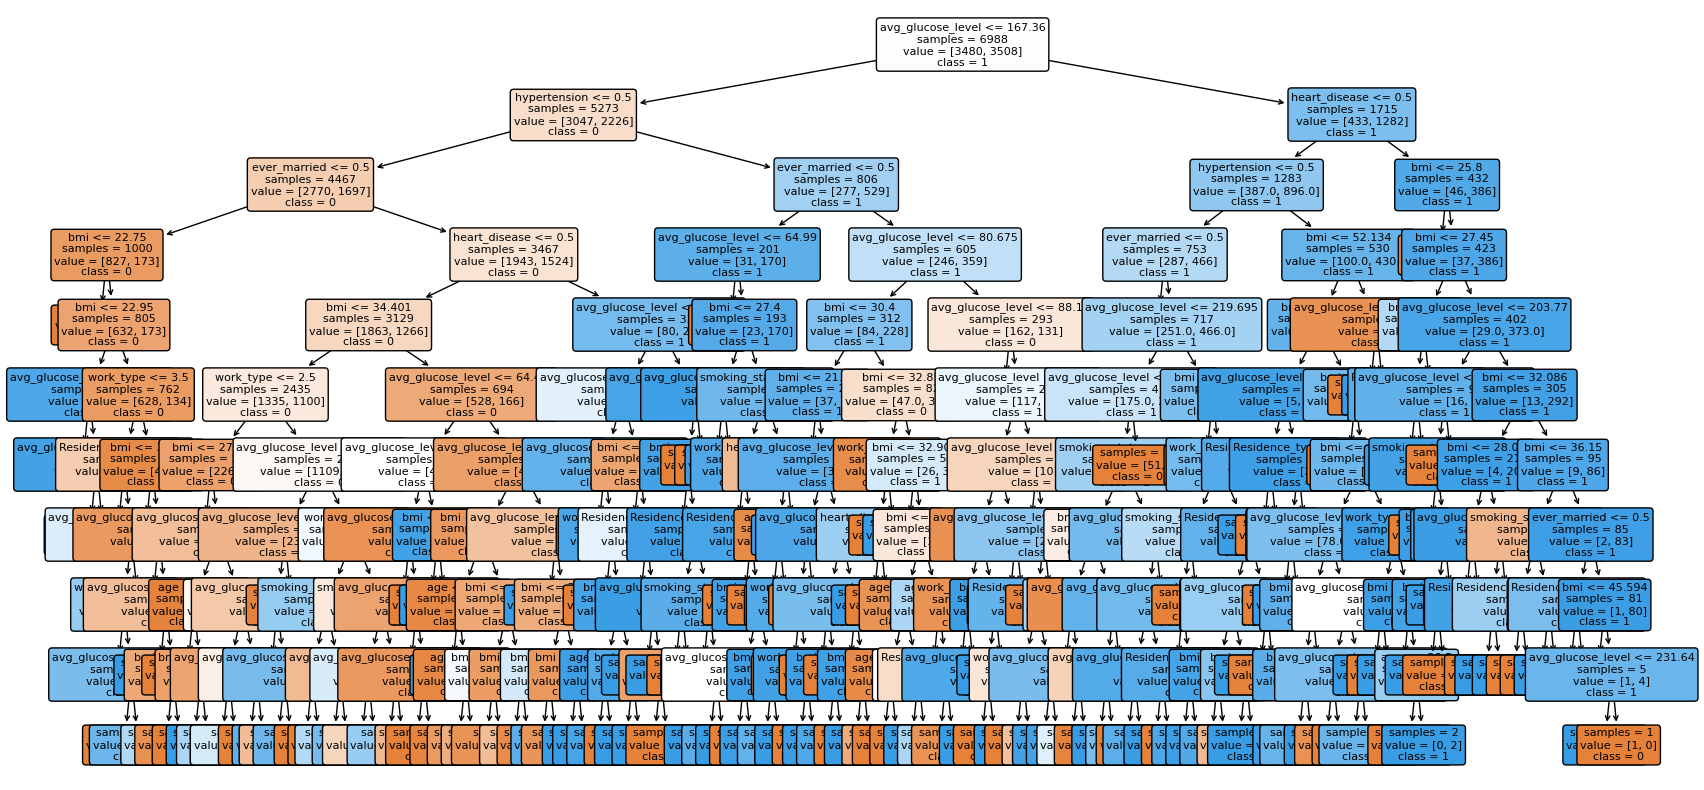

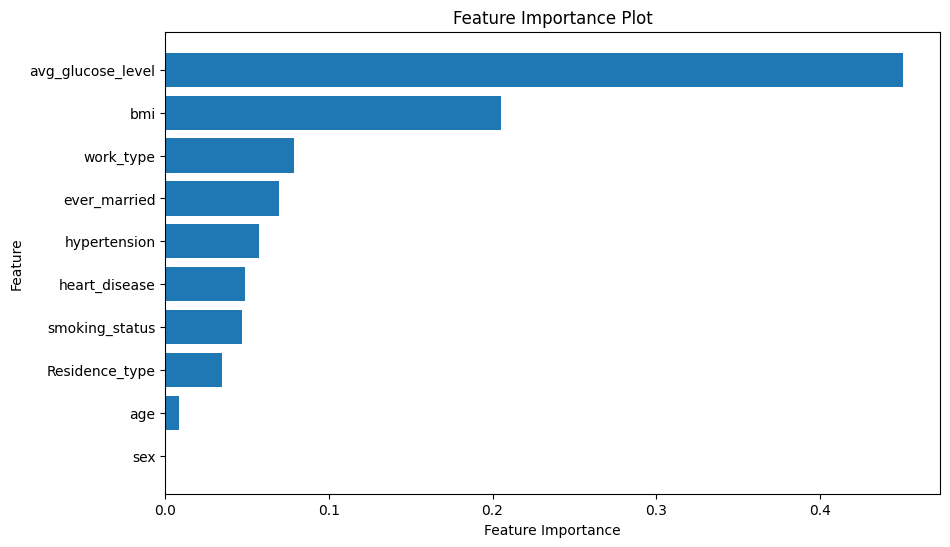

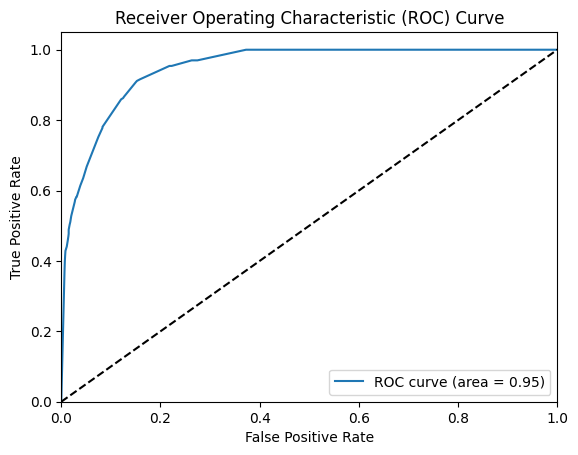

AUC Score: 0.9478006649852486


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.83, 0.78, 0.8266666666666667, 0.83, 0.8333333333333334, 0.8333333333333334, 0.8127090301003345, 0.7892976588628763, 0.8060200668896321, 0.8127090301003345]
Mean accuracy: 0.8154069119286509
95% confidence interval: (0.8018477495835693, 0.8289660742737325)


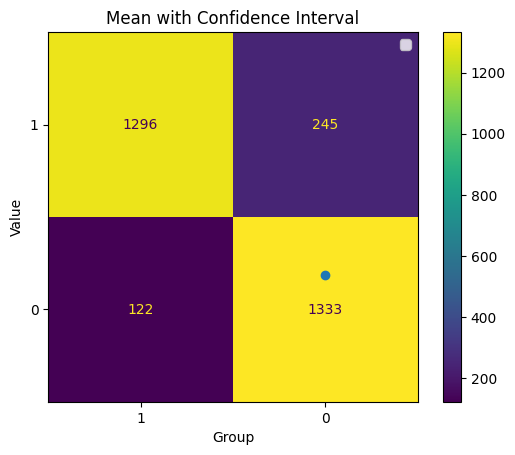

In [26]:
decision_tree = ML_algorithms.model_dt(df_bmi, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.67      0.77      0.72      1541
           1       0.71      0.60      0.65      1455

    accuracy                           0.69      2996
   macro avg       0.69      0.69      0.69      2996
weighted avg       0.69      0.69      0.69      2996



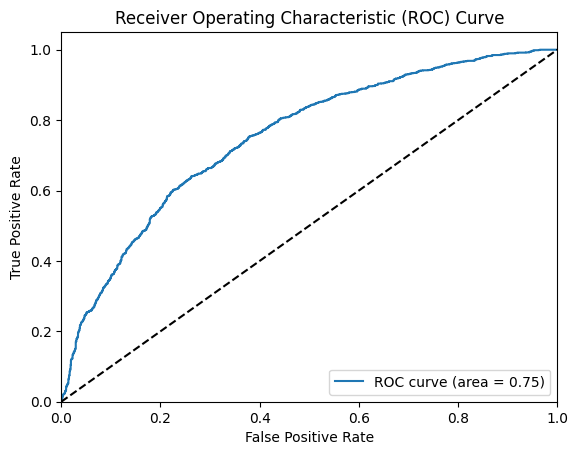

AUC Score: 0.7503526741014782


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6733333333333333, 0.6833333333333333, 0.64, 0.69, 0.67, 0.6733333333333333, 0.6421404682274248, 0.6622073578595318, 0.6086956521739131, 0.6822742474916388]
Mean accuracy: 0.6625317725752508
95% confidence interval: (0.6445479554426107, 0.6805155897078908)


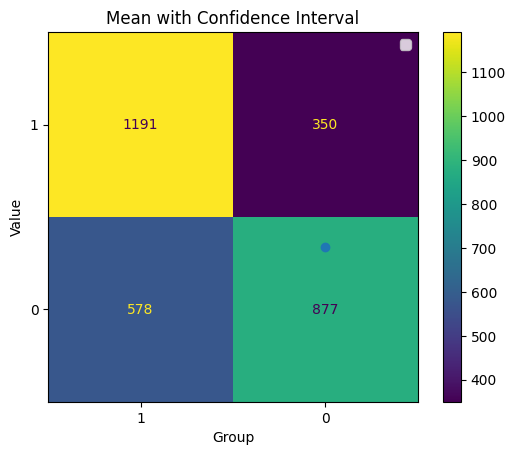

In [27]:
svm = ML_algorithms.model_svm(df_bmi, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)

### Outliers are transformed into values that at 20% above the mean

In [28]:
df_mean_bmi = outliers_utils.replace_outliers_with_above_mean_original(df_original, df_bmi, 'bmi')

Outliers found:


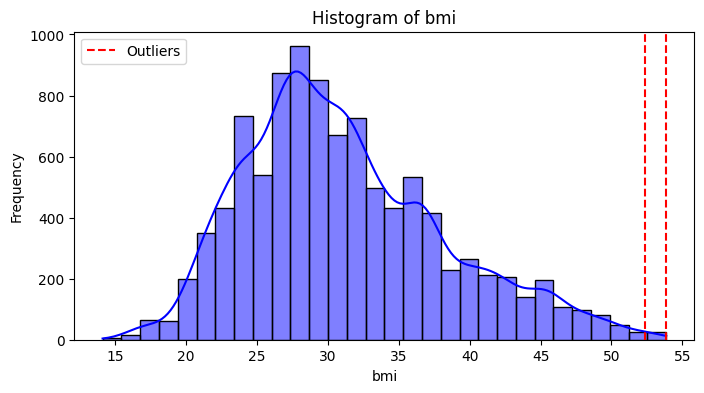

In [29]:
outliers_utils.visualize_outliers_specific(df_mean_bmi, 'bmi')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1541
           1       0.85      0.91      0.88      1455

    accuracy                           0.88      2996
   macro avg       0.88      0.88      0.88      2996
weighted avg       0.88      0.88      0.88      2996

Node Labels:
 Annotation(0.561602, 0.954545, 'avg_glucose_level <= 167.36\nsamples = 6988\nvalue = [3480, 3508]\nclass = 1')


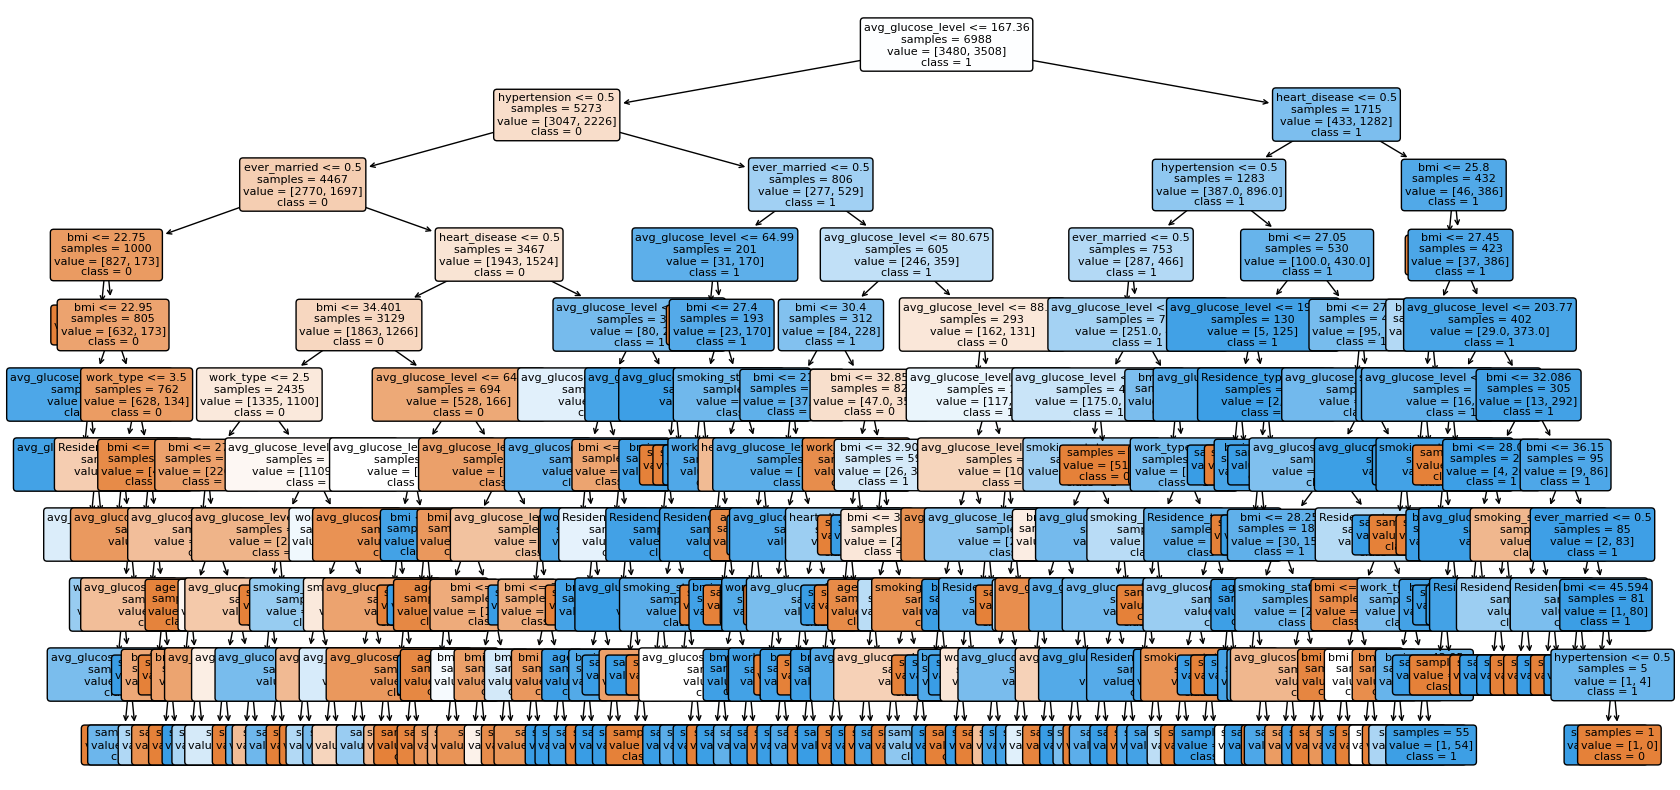

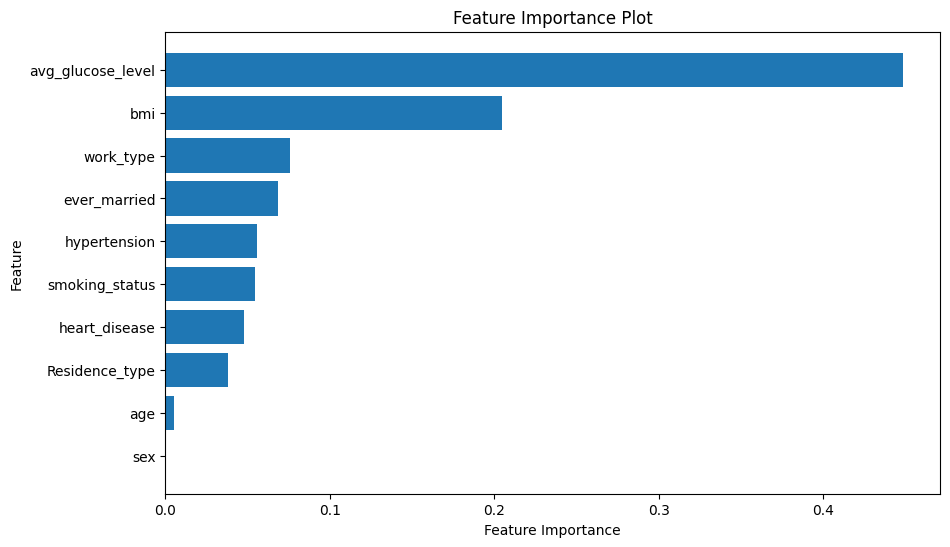

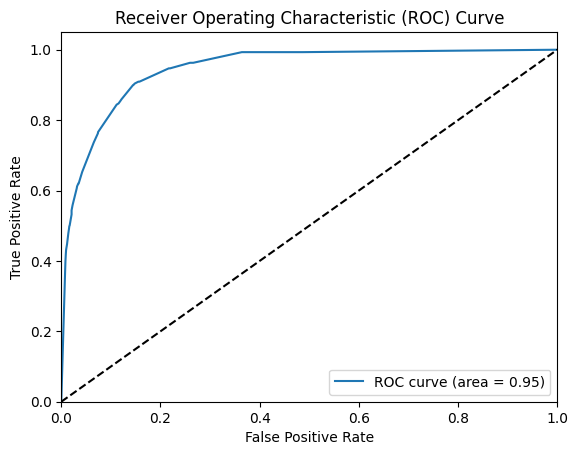

AUC Score: 0.9450510780922816


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8033333333333333, 0.82, 0.7733333333333333, 0.8, 0.8133333333333334, 0.83, 0.8561872909698997, 0.8294314381270903, 0.8127090301003345, 0.8127090301003345]
Mean accuracy: 0.8151036789297658
95% confidence interval: (0.7995309928602906, 0.8306763649992409)


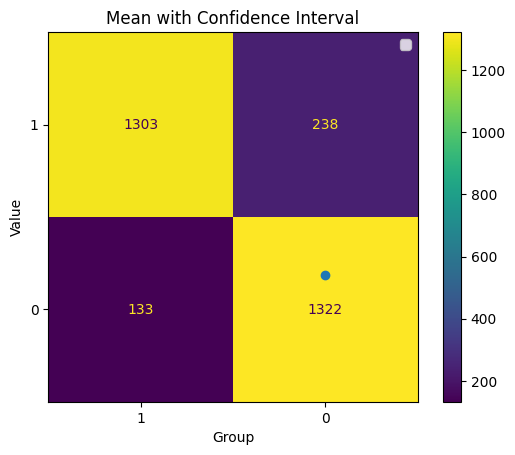

In [30]:
decision_tree = ML_algorithms.model_dt(df_mean_bmi, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.67      0.77      0.72      1541
           1       0.71      0.60      0.65      1455

    accuracy                           0.69      2996
   macro avg       0.69      0.69      0.69      2996
weighted avg       0.69      0.69      0.69      2996



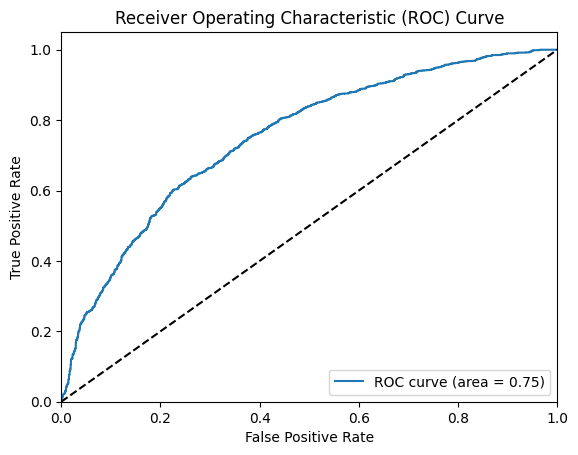

AUC Score: 0.7503821100682155


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.71, 0.65, 0.68, 0.63, 0.7, 0.6466666666666666, 0.6220735785953178, 0.6755852842809364, 0.7123745819397993, 0.6555183946488294]
Mean accuracy: 0.668221850613155
95% confidence interval: (0.6450461935142118, 0.6913975077120982)


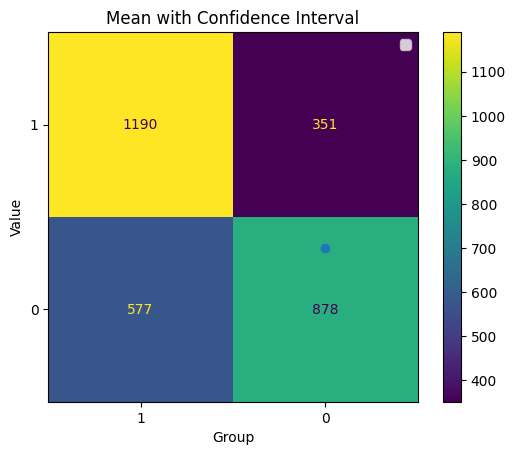

--------------------------------------


In [31]:
svm = ML_algorithms.model_svm(df_mean_bmi, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)
print('--------------------------------------')

## Categorical

In [32]:
df = df_original.copy()

Value counts:
work_type
4    6203
3    2287
2    1345
1     126
0      23
Name: count, dtype: int64
Outliers detected: [4, 3, 2, 1, 0]
Outliers found:


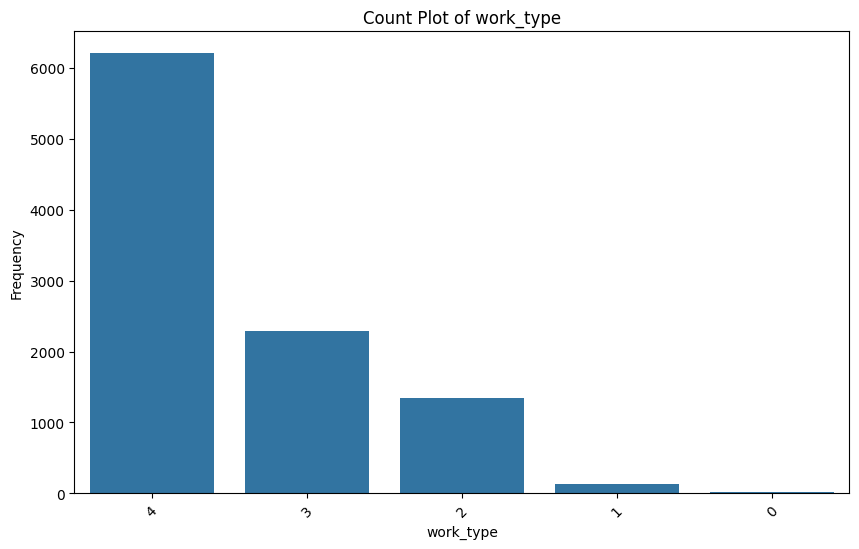

In [33]:
outliers_utils.visualize_outliers_categorical(df, 'work_type')

In [34]:
df_categorical = outliers_utils.add_categorical_outliers('work_type', 10, df)

Valore meno frequente:  0


Value counts:
work_type
4    5578
3    2066
2    1205
0    1018
1     117
Name: count, dtype: int64
Outliers detected: [4, 3, 2, 0, 1]
Outliers found:


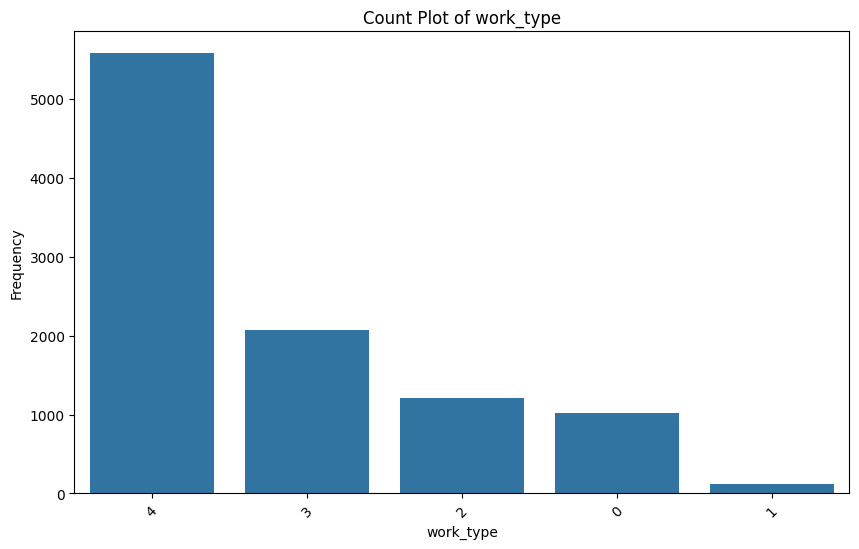

In [35]:
outliers_utils.visualize_outliers_categorical(df_categorical, 'work_type')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.95      0.75      0.84      1541
           1       0.78      0.96      0.86      1455

    accuracy                           0.85      2996
   macro avg       0.87      0.85      0.85      2996
weighted avg       0.87      0.85      0.85      2996

Node Labels:
 Annotation(0.592253, 0.954545, 'avg_glucose_level <= 170.64\nsamples = 6988\nvalue = [3458.0, 3530.0]\nclass = 1')


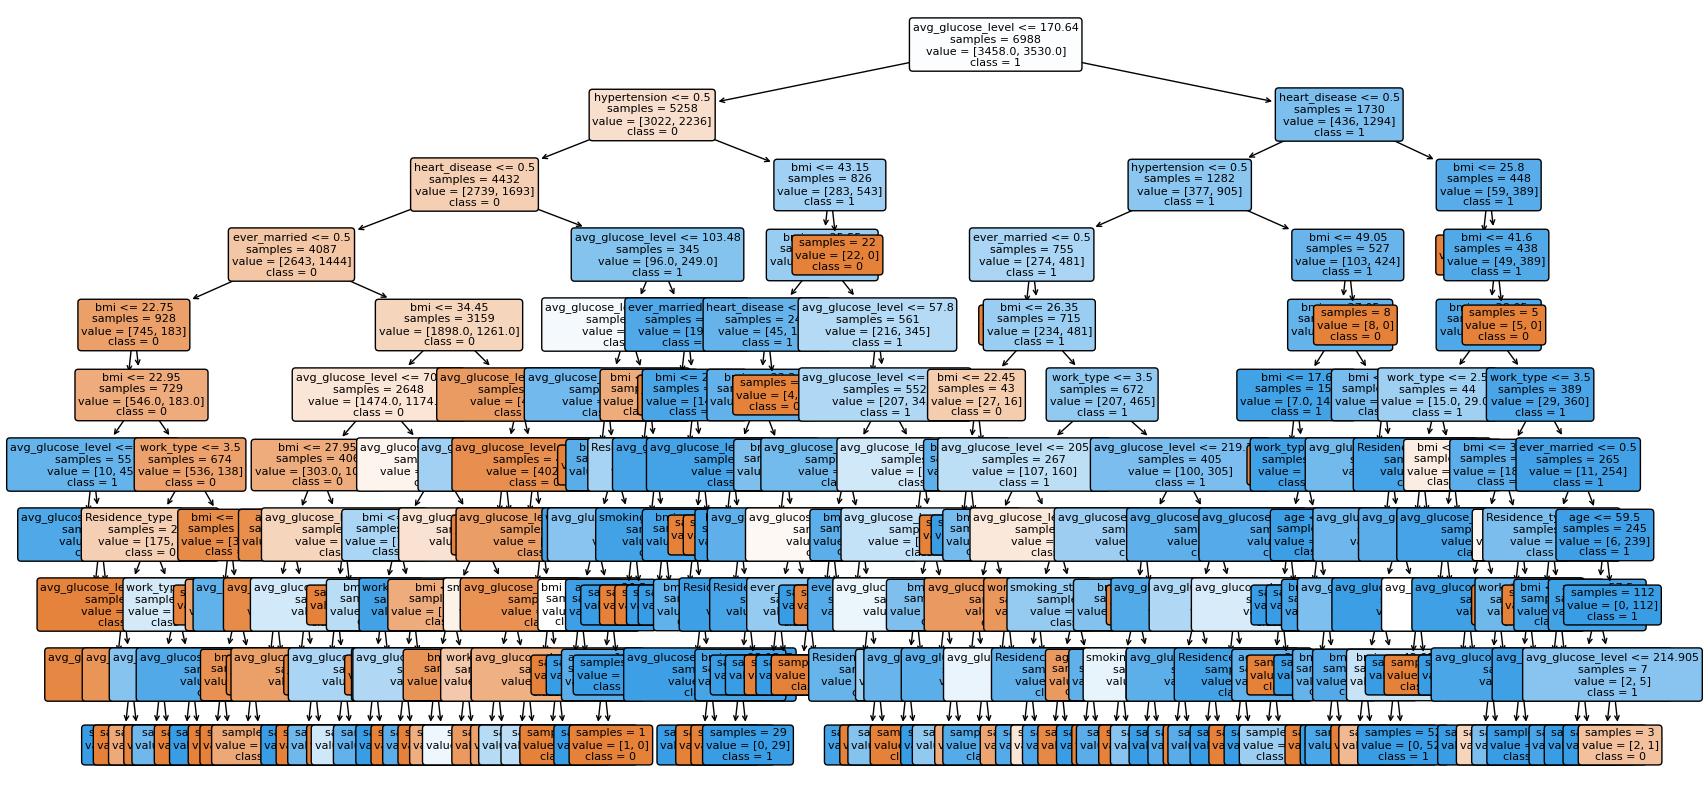

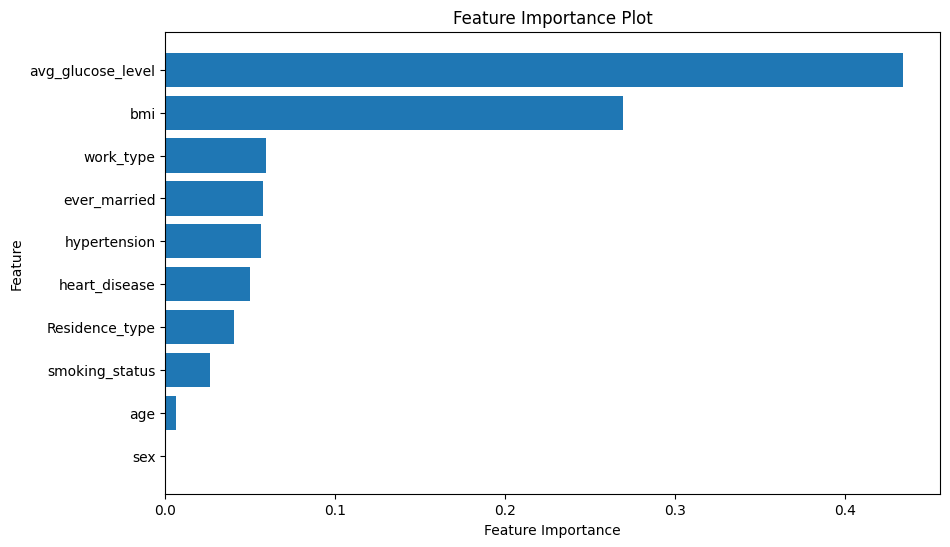

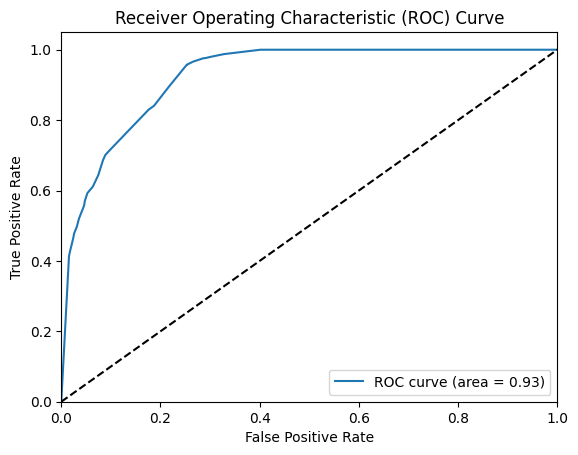

AUC Score: 0.9251545945753081


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8366666666666667, 0.7833333333333333, 0.8266666666666667, 0.7733333333333333, 0.86, 0.8033333333333333, 0.8060200668896321, 0.8327759197324415, 0.7892976588628763, 0.8260869565217391]
Mean accuracy: 0.8137513935340023
95% confidence interval: (0.7942768043371905, 0.833225982730814)


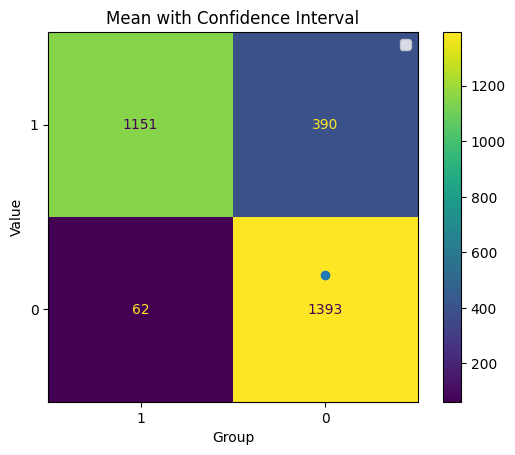

In [36]:
decision_tree = ML_algorithms.model_dt(df_categorical, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.67      0.77      0.72      1541
           1       0.71      0.59      0.65      1455

    accuracy                           0.69      2996
   macro avg       0.69      0.68      0.68      2996
weighted avg       0.69      0.69      0.68      2996



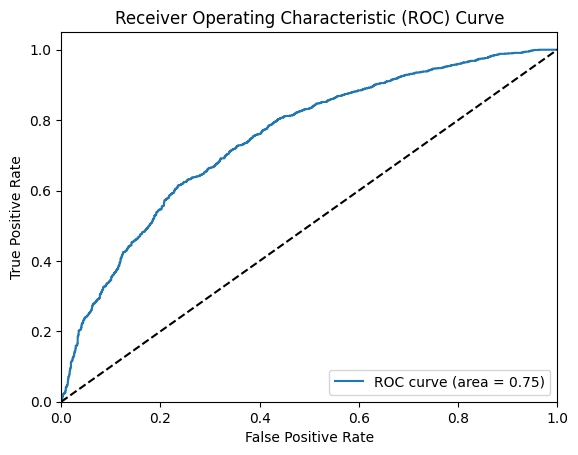

AUC Score: 0.7489504516859896


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6466666666666666, 0.6966666666666667, 0.6766666666666666, 0.7033333333333334, 0.61, 0.6533333333333333, 0.6521739130434783, 0.6588628762541806, 0.6923076923076923, 0.6889632107023411]
Mean accuracy: 0.6678974358974359
95% confidence interval: (0.6471867552330403, 0.6886081165618315)


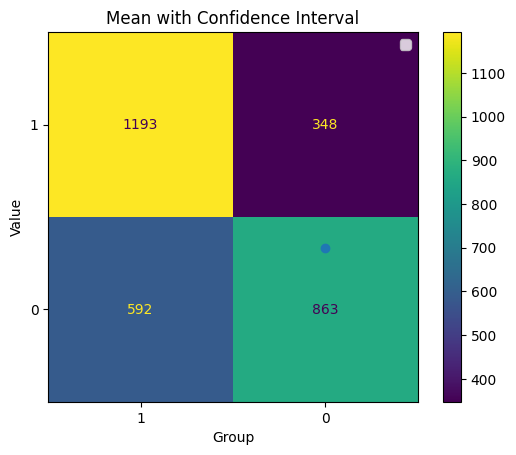

--------------------------------------


In [37]:
svm = ML_algorithms.model_svm(df_categorical, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)

print('--------------------------------------')